## Dataset: [Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection)

## Repro [YOLOv5](https://github.com/ultralytics/yolov5)

In [1]:
!git clone https://github.com/rkuo2000/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 3390, done.
remote: Total 3390 (delta 0), reused 0 (delta 0), pack-reused 3390
Receiving objects: 100% (3390/3390), 7.02 MiB | 27.33 MiB/s, done.
Resolving deltas: 100% (2272/2272), done.
/kaggle/working/yolov5


In [3]:
!mkdir -p Dataset/FaceMask/Images
!mkdir -p Dataset/FaceMask/Labels

In [5]:
# copy image files
!cp -rf /kaggle/input/face-mask-detection/images/* Dataset/FaceMask/Images

In [6]:
!mkdir -p Dataset/images Dataset/labels

## Create Dataset

In [7]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [8]:
FILE_ROOT = "/kaggle/input/face-mask-detection/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
LABELS_ROOT = DATA_ROOT + "FaceMask/Labels"
IMAGES_ROOT = DATA_ROOT + "FaceMask/Images"  

DEST_IMAGES_PATH = "images"
DEST_LABELS_PATH = "labels" 

In [9]:
classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']

### convert annotations (from COCO .xml to YOLO format .txt)

In [10]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

def save_file(img_jpg_file_name, size, img_box):
    save_file_name = LABELS_ROOT + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:

        cls_num = classes.index(box[0])

        new_box = cord_converter(size, box[1:])

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()
    
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        # print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [11]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  maksssksksss737.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss737.xml
Dataset/FaceMask/Labels/maksssksksss737.txt
file name:  maksssksksss410.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss410.xml
Dataset/FaceMask/Labels/maksssksksss410.txt
file name:  maksssksksss537.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss537.xml
Dataset/FaceMask/Labels/maksssksksss537.txt
file name:  maksssksksss295.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss295.xml
Dataset/FaceMask/Labels/maksssksksss295.txt
file name:  maksssksksss771.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss771.xml
Dataset/FaceMask/Labels/maksssksksss771.txt
file name:  maksssksksss234.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss234.xml
Dataset/FaceMask/Labels/maksssksksss234.txt
file name:  maksssksksss620.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss620.xml
Dataset/FaceMask/Labels/maksssksksss620.txt
file n

Dataset/FaceMask/Labels/maksssksksss408.txt
file name:  maksssksksss306.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss306.xml
Dataset/FaceMask/Labels/maksssksksss306.txt
file name:  maksssksksss589.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss589.xml
Dataset/FaceMask/Labels/maksssksksss589.txt
file name:  maksssksksss276.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss276.xml
Dataset/FaceMask/Labels/maksssksksss276.txt
file name:  maksssksksss211.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss211.xml
Dataset/FaceMask/Labels/maksssksksss211.txt
file name:  maksssksksss72.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss72.xml
Dataset/FaceMask/Labels/maksssksksss72.txt
file name:  maksssksksss282.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss282.xml
Dataset/FaceMask/Labels/maksssksksss282.txt
file name:  maksssksksss640.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss640.xml
Dataset/F

file name:  maksssksksss335.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss335.xml
Dataset/FaceMask/Labels/maksssksksss335.txt
file name:  maksssksksss633.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss633.xml
Dataset/FaceMask/Labels/maksssksksss633.txt
file name:  maksssksksss665.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss665.xml
Dataset/FaceMask/Labels/maksssksksss665.txt
file name:  maksssksksss598.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss598.xml
Dataset/FaceMask/Labels/maksssksksss598.txt
file name:  maksssksksss547.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss547.xml
Dataset/FaceMask/Labels/maksssksksss547.txt
file name:  maksssksksss519.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss519.xml
Dataset/FaceMask/Labels/maksssksksss519.txt
file name:  maksssksksss160.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss160.xml
Dataset/FaceMask/Labels/maksssksksss160.txt
file n

Dataset/FaceMask/Labels/maksssksksss42.txt
file name:  maksssksksss396.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss396.xml
Dataset/FaceMask/Labels/maksssksksss396.txt
file name:  maksssksksss208.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss208.xml
Dataset/FaceMask/Labels/maksssksksss208.txt
file name:  maksssksksss500.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss500.xml
Dataset/FaceMask/Labels/maksssksksss500.txt
file name:  maksssksksss165.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss165.xml
Dataset/FaceMask/Labels/maksssksksss165.txt
file name:  maksssksksss117.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss117.xml
Dataset/FaceMask/Labels/maksssksksss117.txt
file name:  maksssksksss541.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss541.xml
Dataset/FaceMask/Labels/maksssksksss541.txt
file name:  maksssksksss492.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss492.xml
Dataset

Dataset/FaceMask/Labels/maksssksksss127.txt
file name:  maksssksksss69.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss69.xml
Dataset/FaceMask/Labels/maksssksksss69.txt
file name:  maksssksksss50.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss50.xml
Dataset/FaceMask/Labels/maksssksksss50.txt
file name:  maksssksksss676.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss676.xml
Dataset/FaceMask/Labels/maksssksksss676.txt
file name:  maksssksksss438.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss438.xml
Dataset/FaceMask/Labels/maksssksksss438.txt
file name:  maksssksksss691.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss691.xml
Dataset/FaceMask/Labels/maksssksksss691.txt
file name:  maksssksksss84.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss84.xml
Dataset/FaceMask/Labels/maksssksksss84.txt
file name:  maksssksksss549.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss549.xml
Dataset/FaceMas

Dataset/FaceMask/Labels/maksssksksss298.txt
file name:  maksssksksss318.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss318.xml
Dataset/FaceMask/Labels/maksssksksss318.txt
file name:  maksssksksss22.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss22.xml
Dataset/FaceMask/Labels/maksssksksss22.txt
file name:  maksssksksss539.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss539.xml
Dataset/FaceMask/Labels/maksssksksss539.txt
file name:  maksssksksss797.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss797.xml
Dataset/FaceMask/Labels/maksssksksss797.txt
file name:  maksssksksss632.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss632.xml
Dataset/FaceMask/Labels/maksssksksss632.txt
file name:  maksssksksss502.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss502.xml
Dataset/FaceMask/Labels/maksssksksss502.txt
file name:  maksssksksss100.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss100.xml
Dataset/F

Dataset/FaceMask/Labels/maksssksksss439.txt
file name:  maksssksksss346.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss346.xml
Dataset/FaceMask/Labels/maksssksksss346.txt
file name:  maksssksksss327.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss327.xml
Dataset/FaceMask/Labels/maksssksksss327.txt
file name:  maksssksksss530.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss530.xml
Dataset/FaceMask/Labels/maksssksksss530.txt
file name:  maksssksksss505.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss505.xml
Dataset/FaceMask/Labels/maksssksksss505.txt
file name:  maksssksksss536.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss536.xml
Dataset/FaceMask/Labels/maksssksksss536.txt
file name:  maksssksksss508.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss508.xml
Dataset/FaceMask/Labels/maksssksksss508.txt
file name:  maksssksksss333.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss333.xml
Datase

file name:  maksssksksss817.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss817.xml
Dataset/FaceMask/Labels/maksssksksss817.txt
file name:  maksssksksss41.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss41.xml
Dataset/FaceMask/Labels/maksssksksss41.txt
file name:  maksssksksss579.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss579.xml
Dataset/FaceMask/Labels/maksssksksss579.txt
file name:  maksssksksss575.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss575.xml
Dataset/FaceMask/Labels/maksssksksss575.txt
file name:  maksssksksss818.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss818.xml
Dataset/FaceMask/Labels/maksssksksss818.txt
file name:  maksssksksss781.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss781.xml
Dataset/FaceMask/Labels/maksssksksss781.txt
file name:  maksssksksss517.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss517.xml
Dataset/FaceMask/Labels/maksssksksss517.txt
file name

file name:  maksssksksss301.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss301.xml
Dataset/FaceMask/Labels/maksssksksss301.txt
file name:  maksssksksss392.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss392.xml
Dataset/FaceMask/Labels/maksssksksss392.txt
file name:  maksssksksss10.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss10.xml
Dataset/FaceMask/Labels/maksssksksss10.txt
file name:  maksssksksss249.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss249.xml
Dataset/FaceMask/Labels/maksssksksss249.txt
file name:  maksssksksss513.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss513.xml
Dataset/FaceMask/Labels/maksssksksss513.txt
file name:  maksssksksss113.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss113.xml
Dataset/FaceMask/Labels/maksssksksss113.txt
file name:  maksssksksss108.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss108.xml
Dataset/FaceMask/Labels/maksssksksss108.txt
file name

Dataset/FaceMask/Labels/maksssksksss305.txt
file name:  maksssksksss609.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss609.xml
Dataset/FaceMask/Labels/maksssksksss609.txt
file name:  maksssksksss280.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss280.xml
Dataset/FaceMask/Labels/maksssksksss280.txt
file name:  maksssksksss135.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss135.xml
Dataset/FaceMask/Labels/maksssksksss135.txt
file name:  maksssksksss752.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss752.xml
Dataset/FaceMask/Labels/maksssksksss752.txt
file name:  maksssksksss663.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss663.xml
Dataset/FaceMask/Labels/maksssksksss663.txt
file name:  maksssksksss314.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss314.xml
Dataset/FaceMask/Labels/maksssksksss314.txt
file name:  maksssksksss518.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss518.xml
Datase

Dataset/FaceMask/Labels/maksssksksss656.txt
file name:  maksssksksss403.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss403.xml
Dataset/FaceMask/Labels/maksssksksss403.txt
file name:  maksssksksss197.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss197.xml
Dataset/FaceMask/Labels/maksssksksss197.txt
file name:  maksssksksss246.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss246.xml
Dataset/FaceMask/Labels/maksssksksss246.txt
file name:  maksssksksss651.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss651.xml
Dataset/FaceMask/Labels/maksssksksss651.txt
file name:  maksssksksss684.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss684.xml
Dataset/FaceMask/Labels/maksssksksss684.txt
file name:  maksssksksss442.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss442.xml
Dataset/FaceMask/Labels/maksssksksss442.txt
file name:  maksssksksss129.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss129.xml
Datase

file name:  maksssksksss606.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss606.xml
Dataset/FaceMask/Labels/maksssksksss606.txt
file name:  maksssksksss107.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss107.xml
Dataset/FaceMask/Labels/maksssksksss107.txt
file name:  maksssksksss753.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss753.xml
Dataset/FaceMask/Labels/maksssksksss753.txt
file name:  maksssksksss722.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss722.xml
Dataset/FaceMask/Labels/maksssksksss722.txt
file name:  maksssksksss398.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss398.xml
Dataset/FaceMask/Labels/maksssksksss398.txt
file name:  maksssksksss1.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss1.xml
Dataset/FaceMask/Labels/maksssksksss1.txt
file name:  maksssksksss425.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss425.xml
Dataset/FaceMask/Labels/maksssksksss425.txt
file name:  

file name:  maksssksksss78.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss78.xml
Dataset/FaceMask/Labels/maksssksksss78.txt
file name:  maksssksksss171.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss171.xml
Dataset/FaceMask/Labels/maksssksksss171.txt
file name:  maksssksksss413.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss413.xml
Dataset/FaceMask/Labels/maksssksksss413.txt
file name:  maksssksksss2.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss2.xml
Dataset/FaceMask/Labels/maksssksksss2.txt
file name:  maksssksksss711.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss711.xml
Dataset/FaceMask/Labels/maksssksksss711.txt
file name:  maksssksksss690.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss690.xml
Dataset/FaceMask/Labels/maksssksksss690.txt
file name:  maksssksksss423.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss423.xml
Dataset/FaceMask/Labels/maksssksksss423.txt
file name:  mak

Dataset/FaceMask/Labels/maksssksksss473.txt
file name:  maksssksksss334.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss334.xml
Dataset/FaceMask/Labels/maksssksksss334.txt
file name:  maksssksksss685.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss685.xml
Dataset/FaceMask/Labels/maksssksksss685.txt
file name:  maksssksksss151.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss151.xml
Dataset/FaceMask/Labels/maksssksksss151.txt
file name:  maksssksksss785.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss785.xml
Dataset/FaceMask/Labels/maksssksksss785.txt
file name:  maksssksksss125.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss125.xml
Dataset/FaceMask/Labels/maksssksksss125.txt
file name:  maksssksksss51.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss51.xml
Dataset/FaceMask/Labels/maksssksksss51.txt
file name:  maksssksksss227.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss227.xml
Dataset/F

## split Images dataset

In [12]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('Dataset/FaceMask/Images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=7)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=8)

print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 853
train : 682
val   : 85
test  : 86


In [15]:
def copy_data(file_list, img_labels_root, imgs_source, type):

    root_file = Path(DATA_ROOT + DEST_IMAGES_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    root_file = Path(DATA_ROOT + DEST_LABELS_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    for file in file_list:
        img_name = file.replace('.png', '')
        img_src_file = imgs_source + '/' + img_name + '.png'
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        # print(img_sor_file)
        # print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = DATA_ROOT + DEST_IMAGES_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = DATA_ROOT + DEST_LABELS_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [16]:
copy_data(train_list, LABELS_ROOT, IMAGES_ROOT, "train")
copy_data(val_list,   LABELS_ROOT, IMAGES_ROOT, "val")
copy_data(test_list,  LABELS_ROOT, IMAGES_ROOT, "test")

## Create data/facemask.yaml

In [17]:
!echo "train: Dataset/images/train\n" > data/facemask.yaml
!echo "val:   Dataset/images/val\n" >> data/facemask.yaml
!echo "nc : 3\n" >> data/facemask.yaml
!echo "names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']\n" >> data/facemask.yaml

!cat data/facemask.yaml

train: Dataset/images/train

val:   Dataset/images/val

nc : 3

names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']



## Train YOLOv5

In [18]:
!python train.py --img 320 --batch 16 --epochs 300 --data data/facemask.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

2021-02-12 13:33:36.276616: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.2
100%|██████████████████████████████████████| 14.5M/14.5M [00:00<00:00, 66.0MB/s]

Scanning 'Dataset/labels/train' for images and labels... 682 found, 0 missing, 0
Scanning 'Dataset/labels/train.cache' for images and labels... 682 found, 0 miss
Scanning 'Dataset/labels/val' for images and labels... 85 found, 0 missing, 0 em
Scanning 'Dataset/labels/val.cache' for images and labels... 85 found, 0 missing

Analyzing anchors... anchors/target = 4.37, Best Possible Recall (BPR) = 0.9991
     0/299    0.763G    0.1231    0.1047   0.03484    0.2627        92       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344           0           0     0.00104    0.000153
     1/299     1.35G    0.1128    0.1132   0.02825    0.2542        72       320
               Class      Image

    29/299     1.35G   0.04098   0.08309  0.007504    0.1316        88       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.471       0.611       0.561       0.312
    30/299     1.35G   0.03841   0.07603   0.00728    0.1217        63       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.433       0.628       0.598       0.341
    31/299     1.35G   0.04009    0.0802  0.007878    0.1282        77       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.505       0.599       0.612       0.352
    32/299     1.35G   0.03879   0.07825  0.007032    0.1241        51       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.567       0.589     

    61/299     1.35G   0.02956   0.07325  0.004385    0.1072        79       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.542       0.715        0.72       0.459
    62/299     1.35G      0.03   0.07315  0.004244    0.1074        56       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.528       0.786       0.767       0.471
    63/299     1.35G     0.031   0.07214   0.00417    0.1073        95       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.646       0.784       0.783        0.48
    64/299     1.35G   0.03107   0.07234  0.004764    0.1082        56       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.574       0.798     

    93/299     1.35G   0.02738   0.06775  0.003004   0.09813        91       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.496       0.746       0.755       0.491
    94/299     1.35G   0.02594     0.062  0.002897   0.09083        55       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.571       0.824       0.791       0.515
    95/299     1.35G   0.02763   0.06971  0.002809    0.1001        81       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.633       0.745       0.785       0.483
    96/299     1.35G   0.02792   0.06544   0.00292   0.09628        51       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.527       0.874     

   125/299     1.35G   0.02449   0.06267   0.00217   0.08932        83       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.599       0.757       0.744       0.493
   126/299     1.35G   0.02473   0.06186  0.002267   0.08886        78       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.634       0.783       0.803       0.513
   127/299     1.35G   0.02545   0.06202  0.002335    0.0898        50       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.554       0.731       0.723       0.474
   128/299     1.35G   0.02559   0.06263  0.002139   0.09036        89       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.646       0.824     

   157/299     1.35G   0.02372   0.05988  0.001948   0.08555        78       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.583       0.769       0.756        0.49
   158/299     1.35G   0.02281   0.05704   0.00175    0.0816        69       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344        0.64       0.791       0.763       0.507
   159/299     1.35G   0.02357   0.05819  0.001618   0.08338        54       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.665       0.802       0.822       0.543
   160/299     1.35G   0.02271   0.05847  0.001841   0.08302        94       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.627       0.809     

   189/299     1.35G   0.02142   0.05716  0.001269   0.07985        85       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.702       0.826       0.817       0.541
   190/299     1.35G   0.02081   0.05342   0.00113   0.07536        47       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.663       0.807        0.83       0.541
   191/299     1.35G     0.022   0.05769  0.001538   0.08122        60       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.734       0.852       0.853       0.548
   192/299     1.35G   0.02187    0.0581  0.001487   0.08146        88       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344        0.69       0.817     

   221/299     1.35G   0.02036   0.05417   0.00134   0.07587        73       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.628       0.738        0.76       0.506
   222/299     1.35G   0.02037   0.05598  0.001155    0.0775       104       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.632       0.782        0.77       0.503
   223/299     1.35G   0.01952   0.05057  0.001208    0.0713        52       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.642       0.784       0.775       0.505
   224/299     1.35G   0.02029   0.05553  0.001226   0.07704       167       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.677        0.78     

   253/299     1.35G   0.01992   0.05086  0.001248   0.07203        96       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.707       0.767       0.788       0.502
   254/299     1.35G   0.01895   0.05161 0.0009842   0.07154        57       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.674       0.819       0.813        0.52
   255/299     1.35G   0.01906   0.05264  0.001137   0.07284        64       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.742       0.789        0.83        0.54
   256/299     1.35G   0.01905   0.05079  0.001147   0.07099        65       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.743       0.755     

   285/299     1.35G   0.01834    0.0503 0.0008578    0.0695        74       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.772       0.764       0.813       0.532
   286/299     1.35G   0.01903   0.05381  0.001095   0.07393        91       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.744       0.763       0.782       0.517
   287/299     1.35G   0.01821   0.04752 0.0007568   0.06649        87       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.786       0.818       0.821       0.528
   288/299     1.35G   0.01903   0.05063  0.001004   0.07066       148       320
               Class      Images     Targets           P           R      mAP@.5
                 all          85         344       0.721       0.789     

In [20]:
# save trained weights for detection
!cp runs/train/exp/weights/best.pt weights

## Test YOLOv5

### detect facemask

In [21]:
!python detect.py --source Dataset/images/test --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='Dataset/images/test', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss1.png: 128x320 7 With_Masks, 1 Without_Masks, Done. (0.014s)
image 2/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss116.png: 192x320 5 With_Masks, Done. (0.013s)
image 3/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss129.png: 256x320 1 With_Masks, 2 Without_Masks, Done. (0.015s)
image 4/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss131.png: 224x320 5 With_Masks, 2 Without_Masks, Done. (0.013s)
image 5/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss135.png: 192x320 2 With_Masks, 2 Without_Masks, Done. (0.013s)
image 6/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss1

image 67/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss763.png: 192x320 2 With_Masks, 1 Without_Masks, Done. (0.012s)
image 68/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss765.png: 320x256 1 With_Masks, Done. (0.012s)
image 69/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss770.png: 192x320 5 With_Masks, 2 Without_Masks, Done. (0.012s)
image 70/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss786.png: 256x320 3 With_Masks, Done. (0.012s)
image 71/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss787.png: 256x320 7 With_Masks, 2 Without_Masks, Done. (0.011s)
image 72/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss79.png: 320x320 5 With_Masks, Done. (0.012s)
image 73/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss797.png: 224x320 6 With_Masks, 1 Incorrect_Masks, Done. (0.012s)
image 74/86 /kaggle/working/yolov5/Dataset/images/test/maksssksksss799.png: 256x320 7 With_Masks, Done. (0.012s)
image 75/86 /kaggle/working

In [22]:
# display detected images
from IPython.display import Image

<function matplotlib.pyplot.show(*args, **kw)>

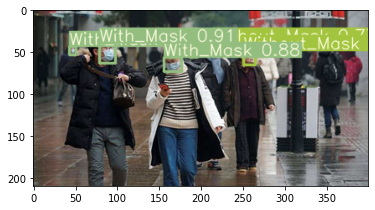

In [23]:
from glob import glob
import matplotlib.pyplot as plt
testfiles = glob('runs/detect/exp/*')

img = plt.imread(testfiles[0]) 
plt.imshow(img)    
plt.show

In [24]:
!python detect.py --source /kaggle/input/input-images/facemask.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/kaggle/input/input-images/facemask.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/1 /kaggle/input/input-images/facemask.jpg: 256x320 15 With_Masks, 1 Without_Masks, Done. (0.014s)
Results saved to runs/detect/exp2
Done. (0.062s)


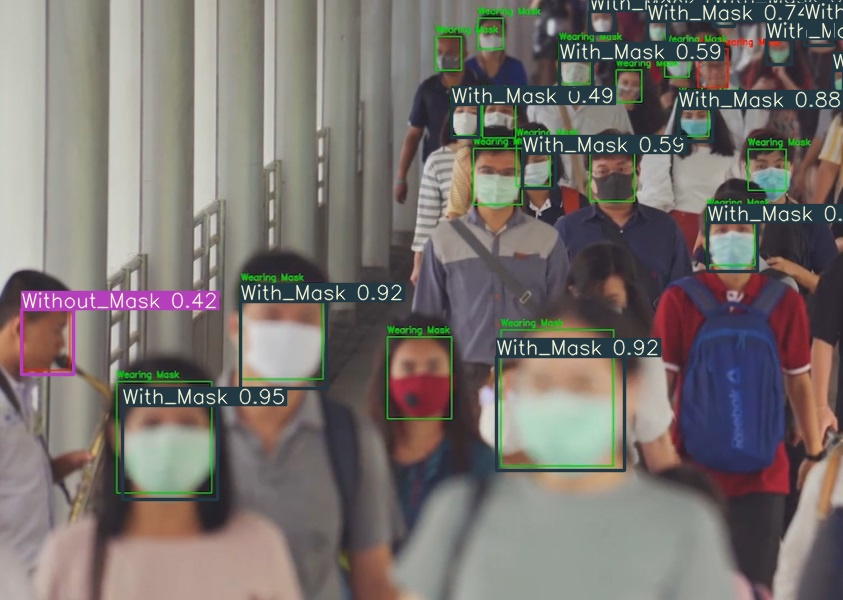

In [25]:
Image('runs/detect/exp2/facemask.jpg')

In [26]:
!python detect.py --source /kaggle/input/input-images/facemask1.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/kaggle/input/input-images/facemask1.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/1 /kaggle/input/input-images/facemask1.jpg: 160x320 1 With_Masks, 2 Without_Masks, Done. (0.013s)
Results saved to runs/detect/exp3
Done. (0.054s)


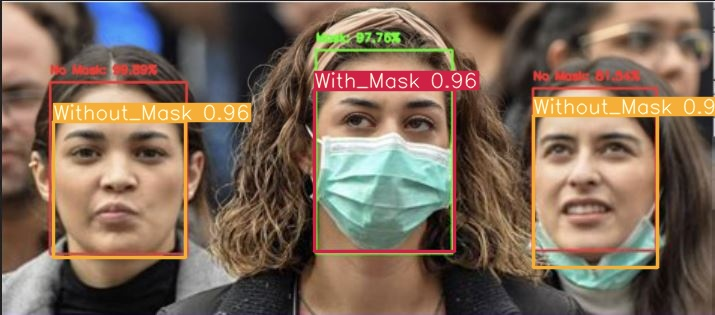

In [27]:
Image('runs/detect/exp3/facemask1.jpg')